In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [5]:
csv_file_path = '/content/stock_data.csv'

df = pd.read_csv(csv_file_path)

df['dt'] = pd.to_datetime(df['dt'])
df['joblessness'] = df['joblessness'].astype('category')

model_data = df.drop(columns=['dt'])

train_data, test_data = train_test_split(model_data, test_size=0.2, random_state= 123)

X_train = train_data.drop(columns=['sp500'])
y_train = train_data['sp500']

In [7]:
full_model = LinearRegression()
full_model.fit(X_train, y_train)
coefficients = pd.DataFrame(
    {'Feature': X_train.columns, 'Coefficient': full_model.coef_}
)
print("Model Coefficients:\n", coefficients)

Model Coefficients:
          Feature   Coefficient
0            vix -3.104834e-01
1   sp500_volume  6.355956e-10
2           djia  8.034241e-03
3    djia_volume -1.933886e-02
4            hsi -9.499080e-04
5            ads -3.863809e-01
6           us3m  8.867214e-01
7    joblessness  1.563383e+00
8            epu  1.262389e-02
9           GPRD -5.323032e-03
10      prev_day  9.417793e-01


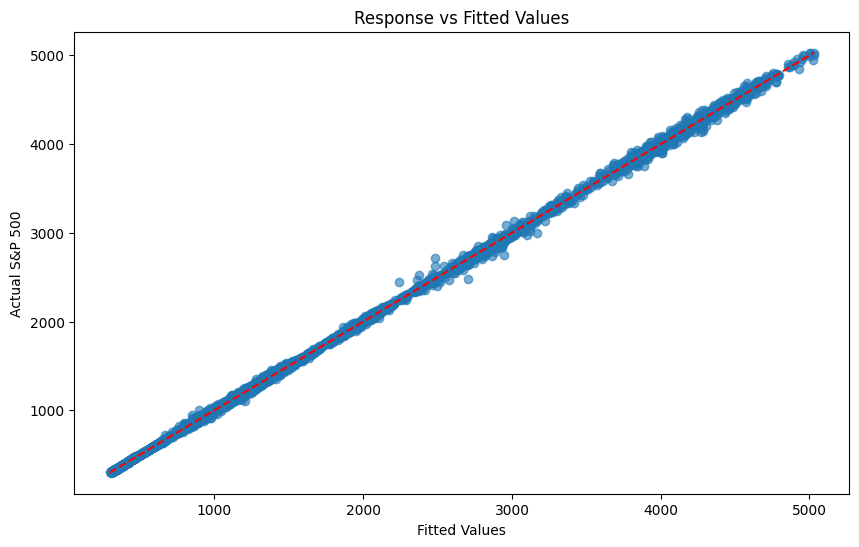

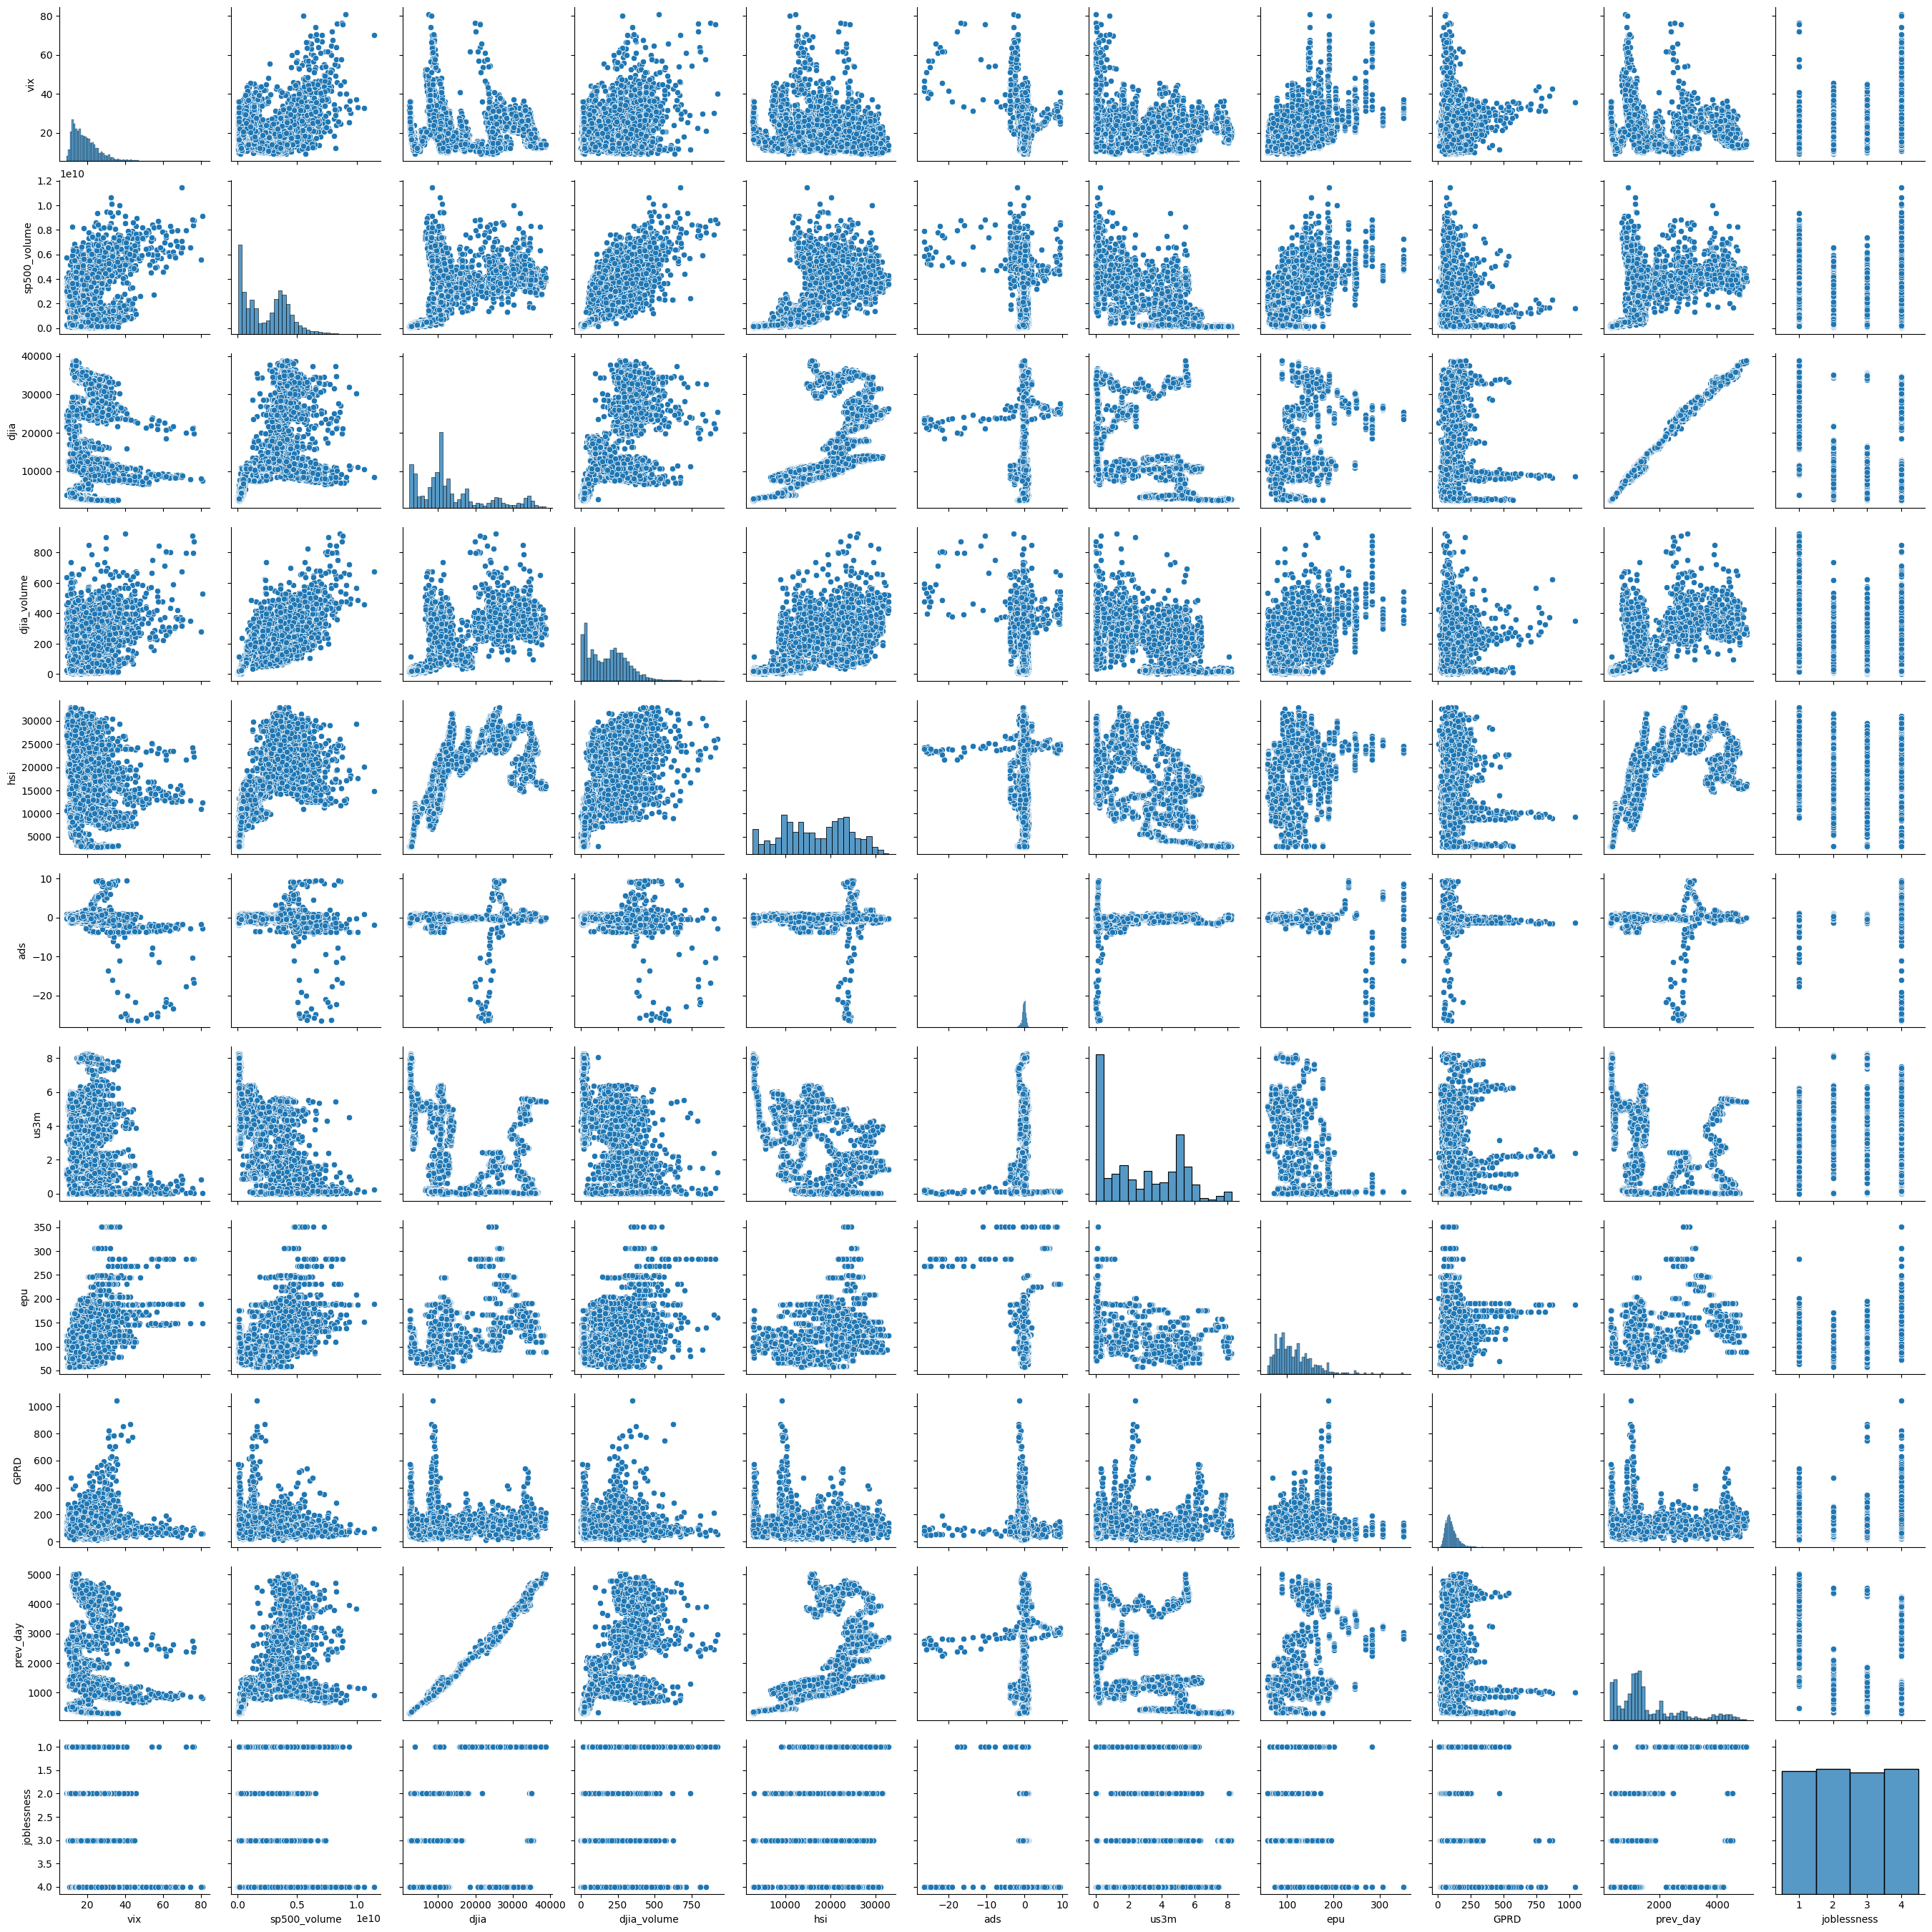

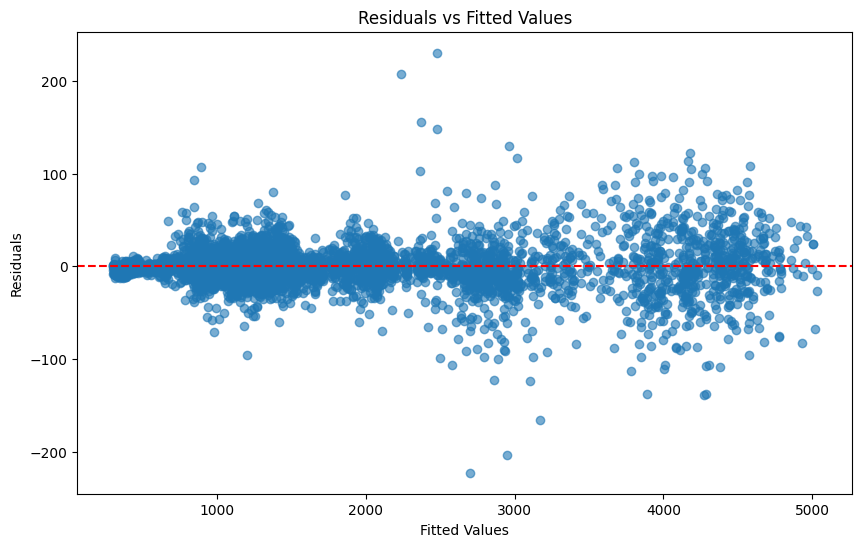

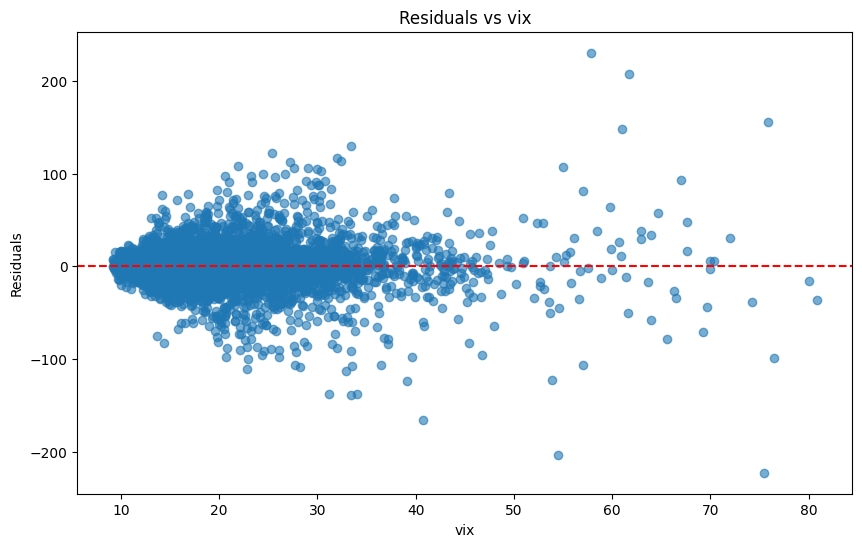

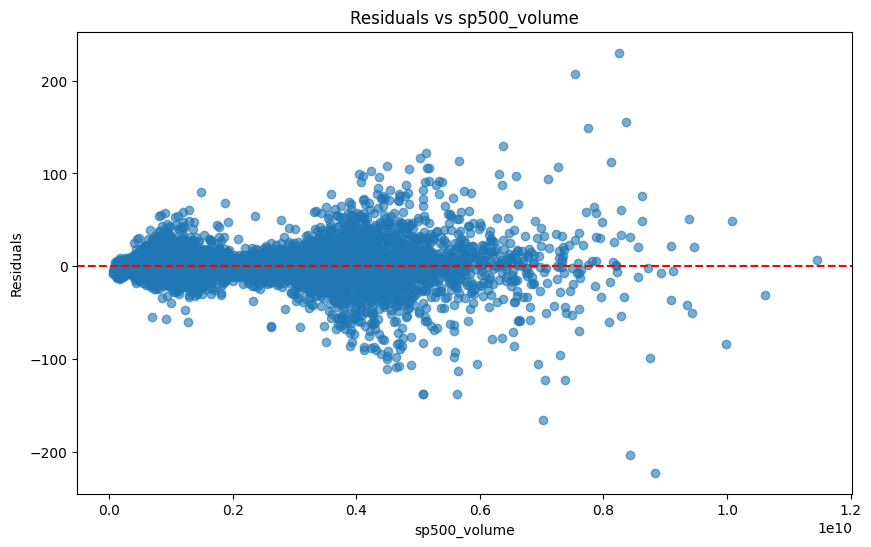

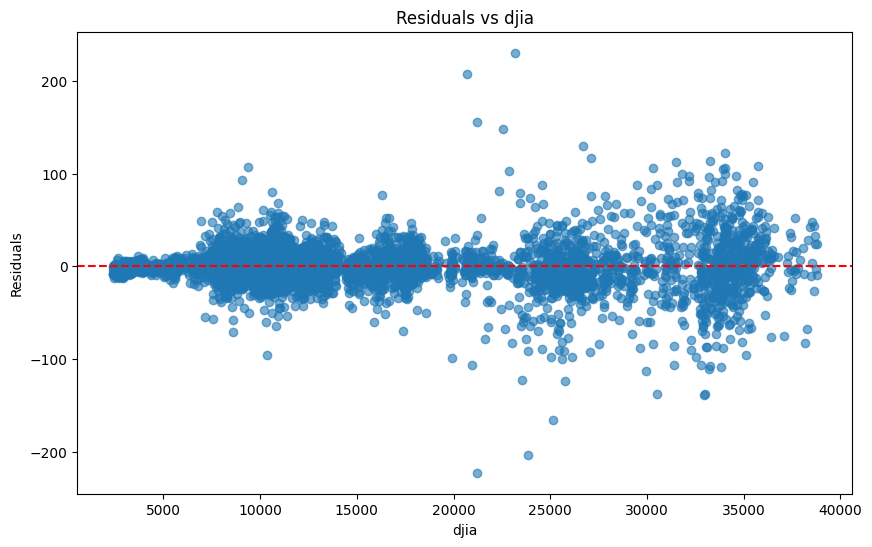

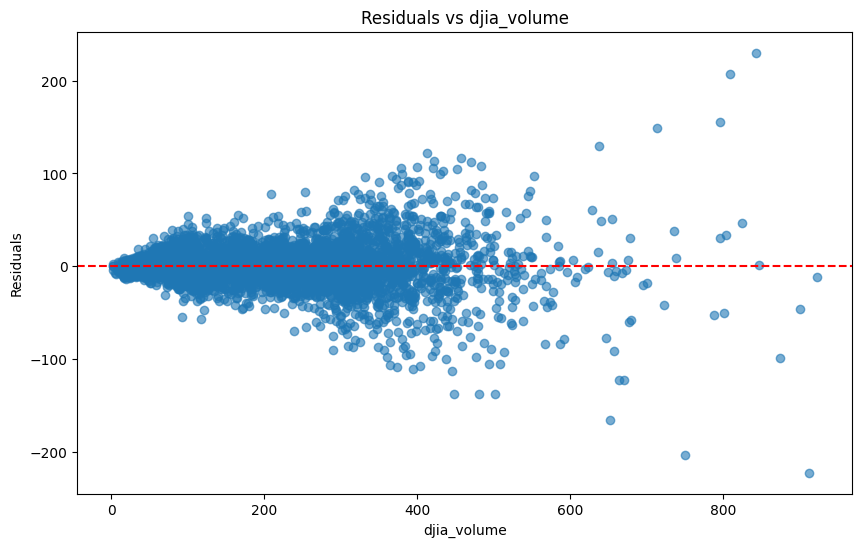

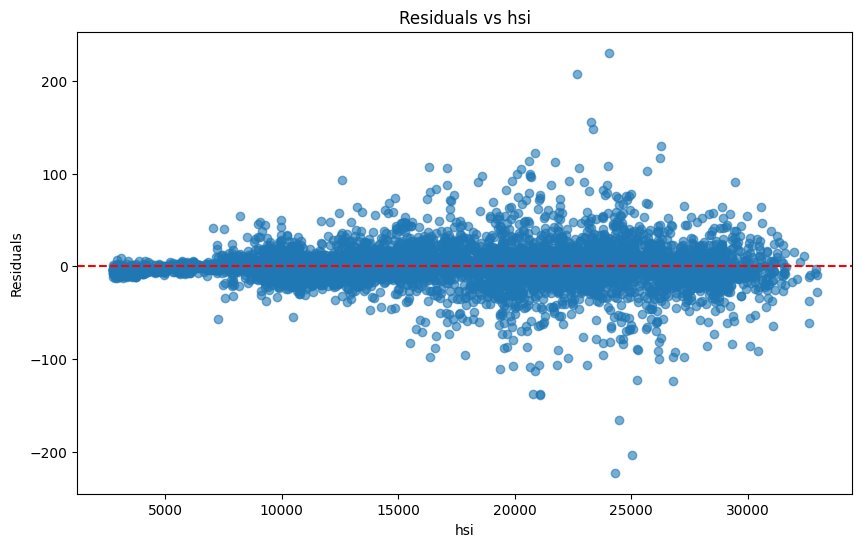

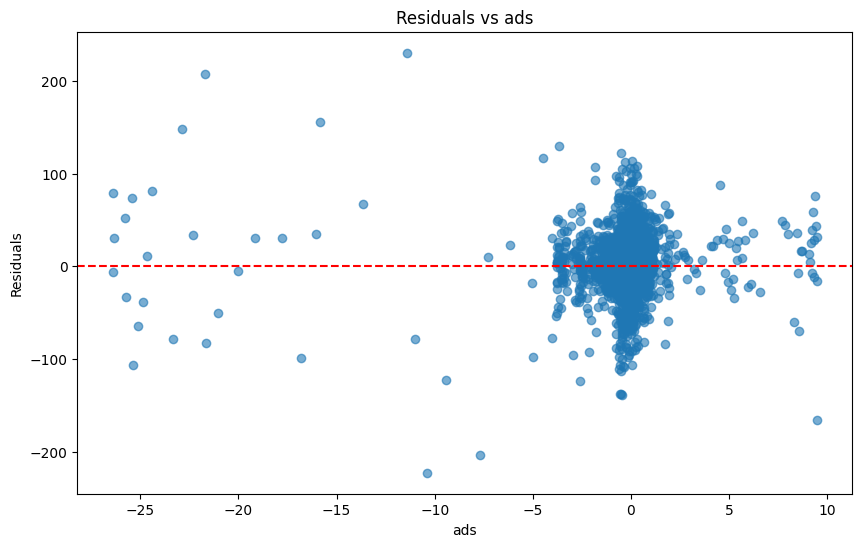

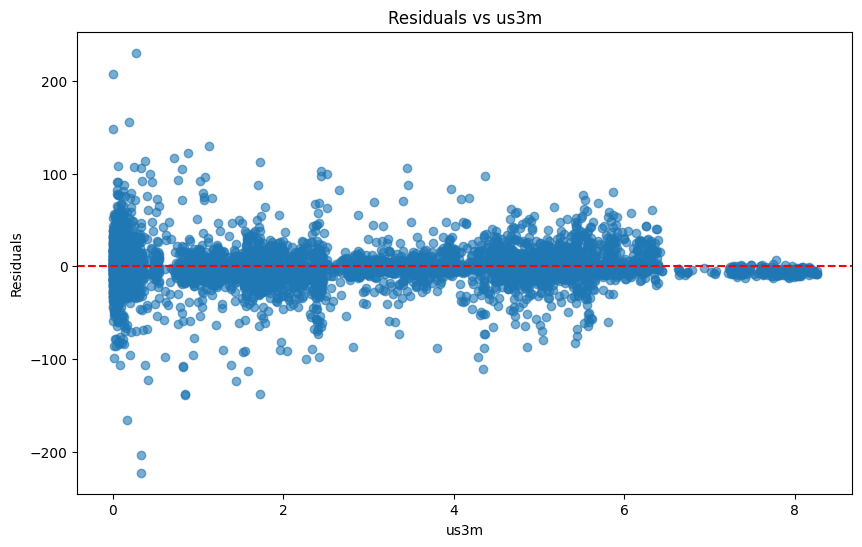

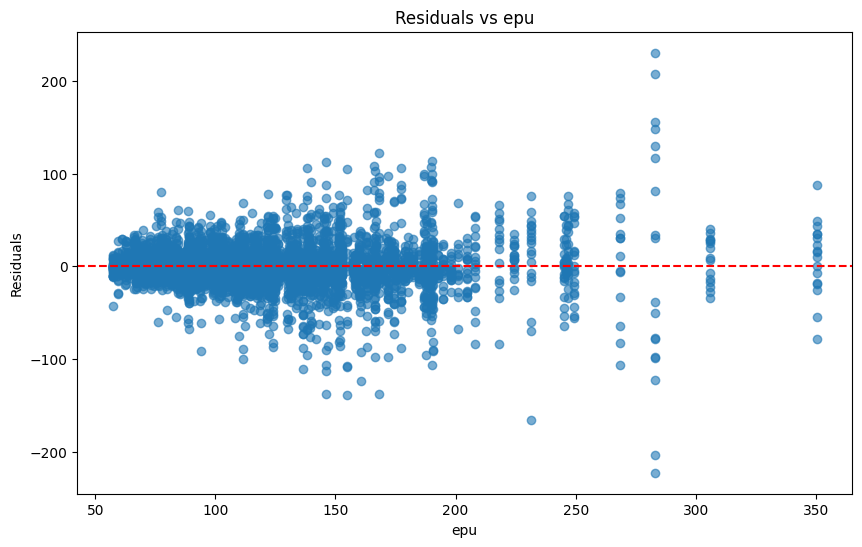

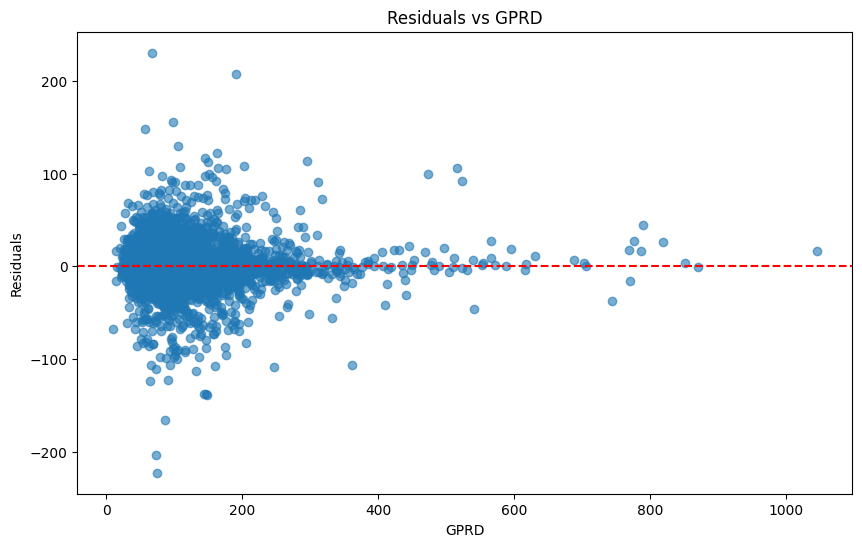

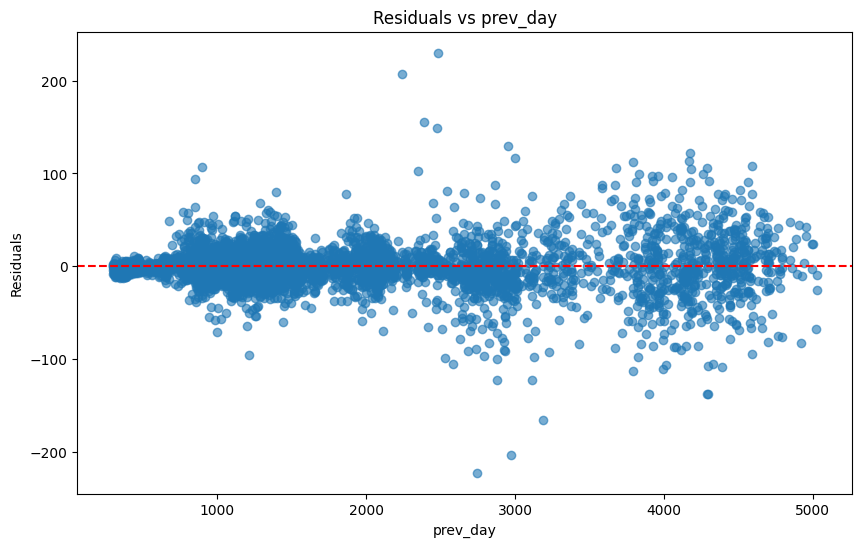

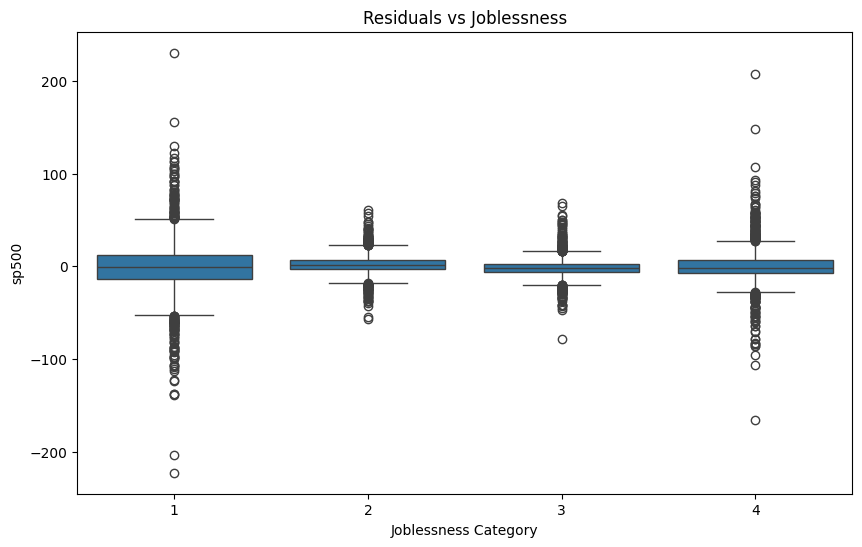

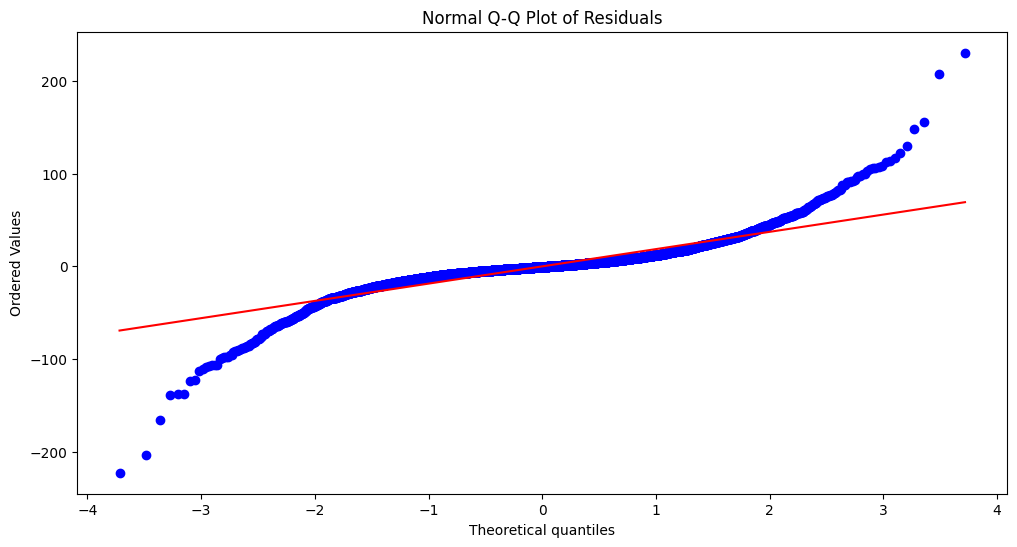

In [9]:
fitted_values = full_model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, y_train, alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.title("Response vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Actual S&P 500")
plt.show()

sns.pairplot(train_data, vars=['vix', 'sp500_volume', 'djia', 'djia_volume', 'hsi', 'ads', 'us3m', 'epu', 'GPRD', 'prev_day', 'joblessness'])
plt.show()

residuals = y_train - fitted_values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

numeric_predictors = X_train.select_dtypes(include=[np.number])
for col in numeric_predictors.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(numeric_predictors[col], residuals, alpha=0.6)
  plt.axhline(0, color='red', linestyle='--')
  plt.title(f"Residuals vs {col}")
  plt.xlabel(col)
  plt.ylabel("Residuals")
  plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['joblessness'], y=residuals)
plt.title("Residuals vs Joblessness")
plt.xlabel("Joblessness Category")
plt.show()

plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

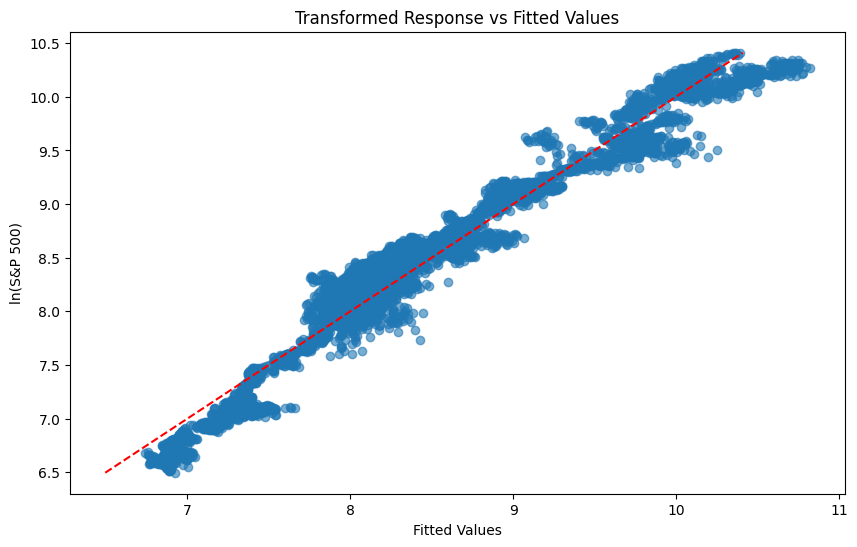

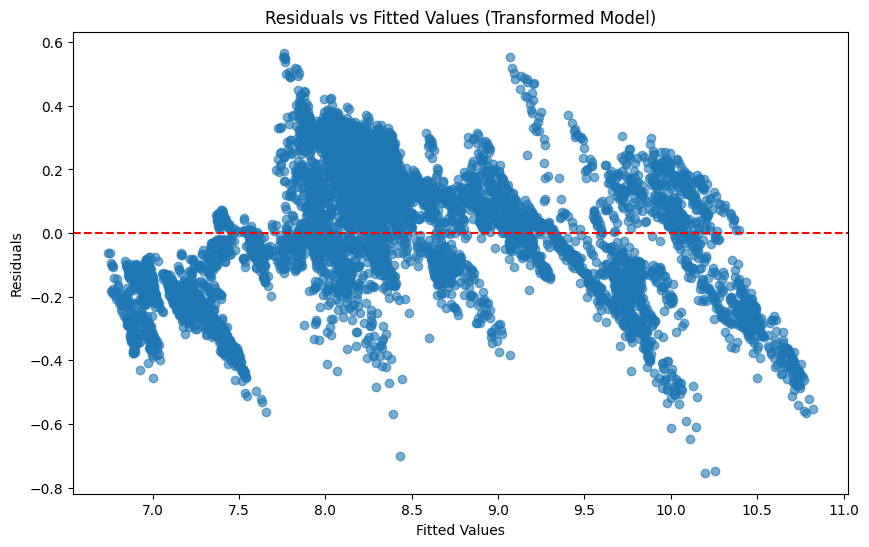

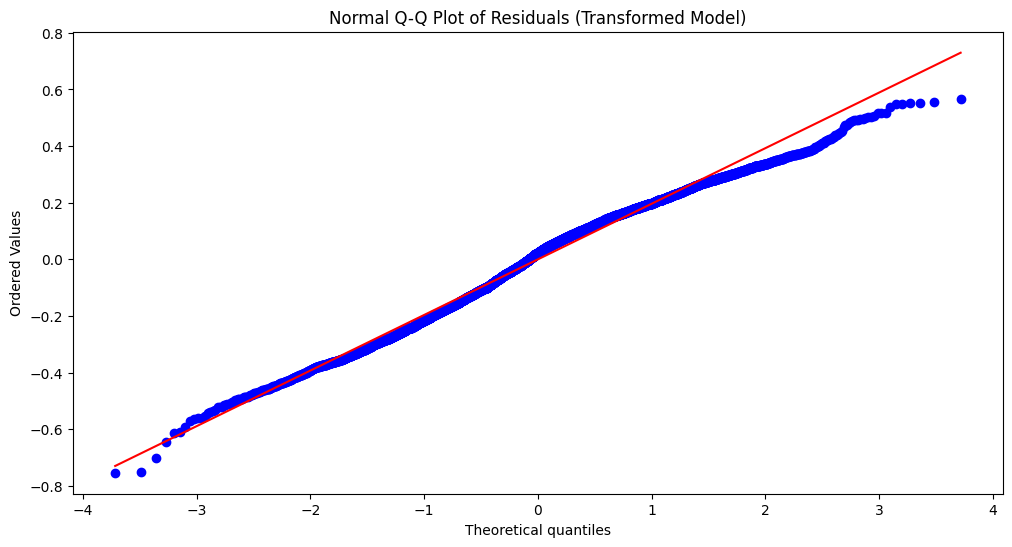

Transformed Model Coefficients:
          Feature   Coefficient
0            vix  1.169206e-02
1   sp500_volume -3.837905e-11
2           djia  2.263263e-05
3    djia_volume  6.042521e-04
4            hsi  3.724156e-05
5            ads  6.611908e-03
6           us3m -4.670667e-02
7    joblessness -6.970256e-02
8            epu -2.285610e-03
9           GPRD -9.288520e-05
10      prev_day  4.115998e-04


In [10]:
train_data['ln_sp500'], lambda_value = stats.boxcox(y_train + 1)

X_train_trans = X_train.copy()
X_train_trans['ln_sp500'] = train_data['ln_sp500']
transformed_model = LinearRegression()
transformed_model.fit(X_train_trans.drop(columns=['ln_sp500']), X_train_trans['ln_sp500'])

fitted_values_trans = transformed_model.predict(X_train_trans.drop(columns=['ln_sp500']))
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_trans, X_train_trans['ln_sp500'], alpha=0.6)
plt.plot([min(X_train_trans['ln_sp500']), max(X_train_trans['ln_sp500'])],
         [min(X_train_trans['ln_sp500']), max(X_train_trans['ln_sp500'])], 'r--')
plt.title("Transformed Response vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("ln(S&P 500)")
plt.show()

residuals_trans = X_train_trans['ln_sp500'] - fitted_values_trans
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_trans, residuals_trans, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (Transformed Model)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

plt.figure(figsize=(12, 6))
stats.probplot(residuals_trans, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals (Transformed Model)")
plt.show()

print("Transformed Model Coefficients:\n", pd.DataFrame(
    {'Feature': X_train.columns, 'Coefficient': transformed_model.coef_}
))